
**Exploratory Data Analysis - Terrorism**
(Level - Intermediate)<br>

● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’<br>
● As a security/defense analyst, try to find out the hot zone of terrorism.<br>
● What all security issues and insights you can derive by EDA?<br>
● You can choose any of the tool of your choice
(Python/R/Tableau/PowerBI/Excel/SAP/SAS)<br>
● Dataset: https://bit.ly/2TK5Xn5<br>




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
from IPython.display import clear_output
import warnings

In [2]:
# Upload the csv 
# Here is website of the dataset https://www.start.umd.edu/gtd/
# Here is Kaggle link https://www.kaggle.com/gpreda/global-terrorist-attacks

from google.colab import files
uploaded = files.upload()

Saving globalterrorismdb_0718dist.csv to globalterrorismdb_0718dist.csv


In [8]:
df =  pd.read_csv("globalterrorismdb_0718dist.csv",encoding ='ISO-8859-1', low_memory=False) #https://stackoverflow.com/questions/6539881/python-converting-from-iso-8859-1-latin1-to-utf-8
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


### **We keept relevant information for our Analysis**<br>
We rename columns and keep 20 Columns.

In [24]:
df.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)

#Keep 20 Columns
data =  df[['Eventid', 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 
                  'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound']]

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Eventid      181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Country      181691 non-null  object 
 3   Region       181691 non-null  object 
 4   Provstate    181270 non-null  object 
 5   City         181257 non-null  object 
 6   Crit1        181691 non-null  int64  
 7   Crit2        181691 non-null  int64  
 8   Crit3        181691 non-null  int64  
 9   Success      181691 non-null  int64  
 10  Suicide      181691 non-null  int64  
 11  Attacktype   181691 non-null  object 
 12  Targtype     181691 non-null  object 
 13  Natlty1      180132 non-null  object 
 14  Gname        181691 non-null  object 
 15  Guncertain1  181311 non-null  float64
 16  Claimed      115571 non-null  float64
 17  Weaptype     181691 non-null  object 
 18  Nkill        171378 non-

In [26]:
#get the idea where killed most
print('Country where most people killed:' , data['Country'].value_counts().index[0])
print('Regions with the highest number of  Terrorist Attacks:',data['Region'].value_counts().index[0])
print('Maximum number of people were killed by a single terrorist attack are',data['Nkill'].max(),'people that took place in',new_data.loc[data['Nkill'].idxmax()].Country)


Country where most people killed: Iraq
Regions with the highest number of  Terrorist Attacks: Middle East & North Africa
Maximum number of people were killed by a single terrorist attack are 1570.0 people that took place in Iraq


In [27]:
#Add column Damage (Number of Dead/Injured people) by adding Nkill and Nwound
data['Damage'] = data['Nkill'] + data['Nwound']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
#Change some long words inside the dataset
data['Country'] = data['Country'].replace('South Vietnam','Vietnam', regex=True)
data['Weaptype'] = data['Weaptype'].replace('Vehicle .*','Vehicle', regex=True)
data['Attacktype'] = data['Attacktype'].replace('Hostage Taking .*','Hostage Taking', regex=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

# **Part 2: Data analysis of Global Terrorism from 1970 to 2017**<br>
Comparing the number of Terrorist Attacks and the number of Dead/Injured people from 1970 to 2017

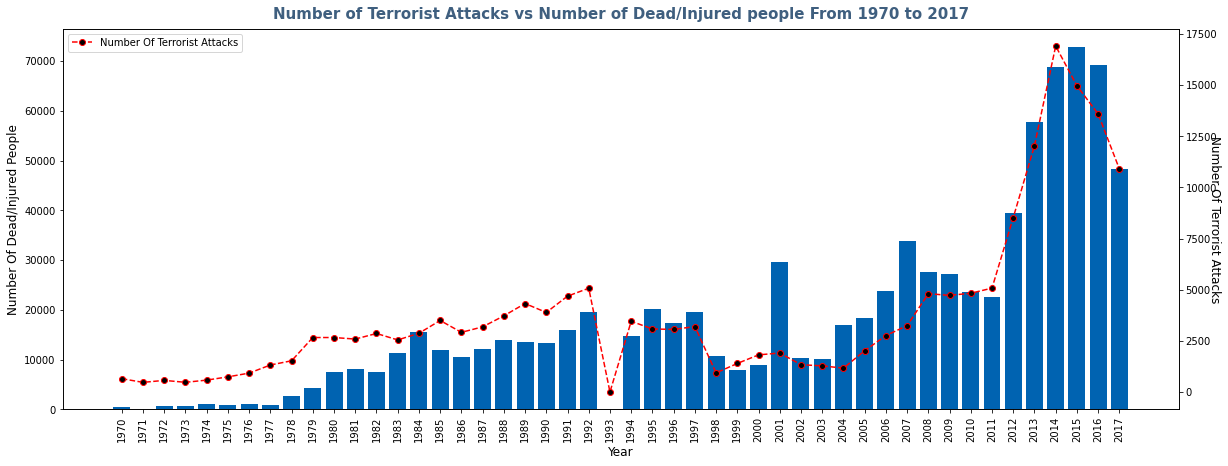

In [37]:
#Filter Data to choose Number Of Dead/Injured People In Terrorist Attacks From 1970 to 2017
people_damage =  data[['Year' , 'Damage']].groupby('Year').sum()
list_year =  data["Year"].unique().tolist()

#Ploting Bar Chat
fig , ax1 = plt.subplots(figsize = (20 , 7))
ax1.bar(people_damage.index, [i[0] for i in people_damage.values] , color = '#0063B1')
ax1.set_xticklabels(np.arange(1970 , 2107 , step = 1), rotation=90)
ax1.set_ylabel('Number Of Dead/Injured People', size = 12)
ax1.set_xlabel('Year', size = 12)

ax1.set_title('Number of Terrorist Attacks vs Number of Dead/Injured people From 1970 to 2017', fontsize= 15, pad= 10, weight ='bold', color = sns.cubehelix_palette (8, start=.5, rot =-.75)[-3])
ax2 = ax1.twinx() #https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.twinx.html

#Filter & get a number of attacked in the world from 1970 to 2017 
number_attack = []
for year in list_year:
    number_attack.append(len(data[data['Year'] == year][["Year"]]))
number_attack.insert(23, 0)

#Draw plot chart
ax2.set_ylabel('Number Of Terrorist Attacks', size = 12,rotation=-90)
ax2.plot(range(1970, 2018), number_attack, 'r--o', mfc='k', label='Number Of Terrorist Attacks')

plt.xticks(np.arange(1970, 2018, step=1))
plt.legend(loc='upper left')
plt.show()


**Analyse the Terrorist attack types and Damage**

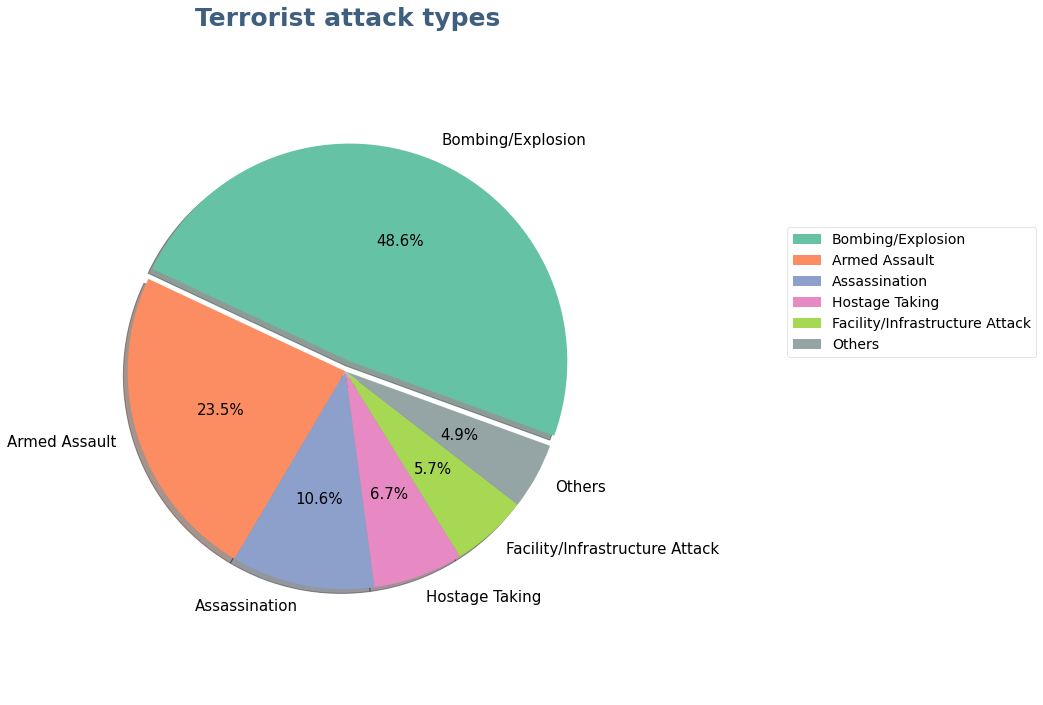

In [39]:
atk_filtered = data['Attacktype'].apply(lambda x: x if x in ['Bombing/Explosion','Armed Assault','Assassination', 'Hostage Taking',
                                                            'Facility/Infrastructure Attack'] else 'Others')
attack_type =  atk_filtered.value_counts().tolist()

#Pie Chart
labels = ['Bombing/Explosion','Armed Assault','Assassination',
          'Hostage Taking','Facility/Infrastructure Attack','Others']

sizes = []

for i in attack_type:
    percent = i*100/len(data['Attacktype'])
    sizes.append(percent)

fig, ax = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle = -20, shadow = True,
        explode = (0.05, 0, 0, 0, 0, 0),
        colors = sns.color_palette("Set2", 8)[:5]+[(0.5843137254901961, 0.6470588235294118, 0.6509803921568628)],
        textprops={'fontsize':15,'weight':'light','color':'k'})

ax.axis('equal')
plt.title('Terrorist attack types', fontsize= 25, pad= -70, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) #pad change the distance from title to graph
plt.tight_layout()
ax.legend(loc='lower right',framealpha = 0.5,bbox_to_anchor=(1.8,0.5,0.1,1), prop ={'size': 14})
fig.show()

In [40]:
# Create table_1 about Attack types and number of Dead/Injured People

cat = ['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack']
color_cat = sns.color_palette("Set2", 8)[:5]
color_cat_dict = dict(zip(cat, color_cat))

table_1 = data[['Attacktype','Damage']].groupby('Attacktype',as_index = False).sum().sort_values(by='Damage', ascending=False)
table_1 = table_1.reset_index()

inci = [88255,42669,7276,19312,12149,659,1015,10356]
table_1["Incidents"] = np.array(inci)

table_1["Damage_rate"] = table_1["Damage"]/table_1["Incidents"]
table_1

,index,Attacktype,Damage,Incidents,Damage_rate
0,2,Bombing/Explosion,514233.0,88255,5.826673
1,0,Armed Assault,212386.0,42669,4.977525
2,7,Unknown,39606.0,7276,5.443375
3,1,Assassination,37209.0,19312,1.926729
4,5,Hostage Taking,27732.0,12149,2.282657
5,4,Hijacking,20642.0,659,31.323217
6,6,Unarmed Assault,14791.0,1015,14.572414
7,3,Facility/Infrastructure Attack,6293.0,10356,0.607667


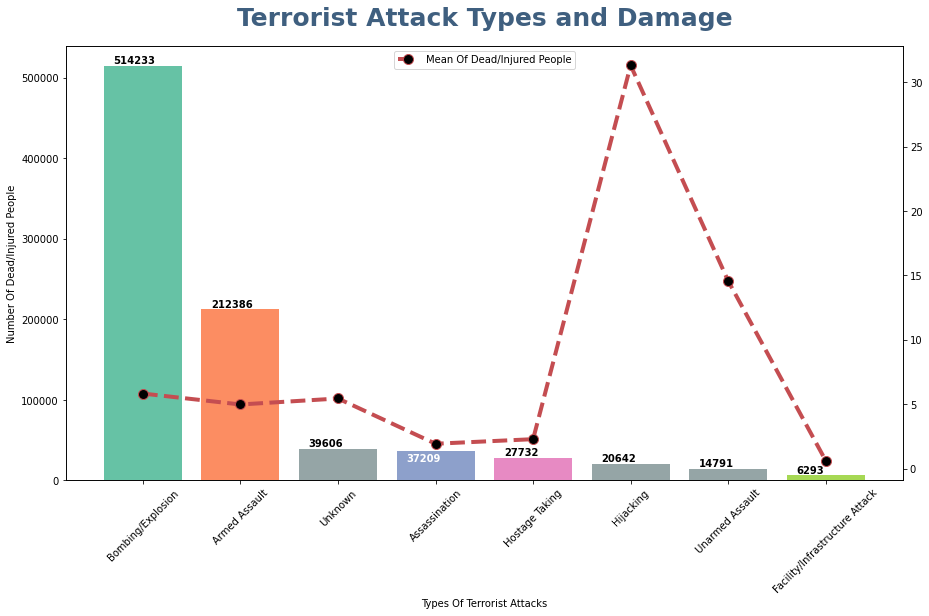

In [41]:

# Draw chart of Terrorist Attack Types and the Damage
labels = table_1['Attacktype'].tolist()
x = np.arange(len(labels)) 
dmg = table_1['Damage'].tolist()

gray = (0.5843137254901961, 0.6470588235294118, 0.6509803921568628)
color_list = [color_cat_dict[ter_type] if ter_type in color_cat_dict.keys() else gray for ter_type in labels]

d_rate = table_1["Damage_rate"].tolist()
fig, ax1 = plt.subplots(figsize=(15,8))

# Bar chart
ax1.bar(labels, dmg,
       color = color_list,
       align='center')

# Number in bar chart
for i,v in enumerate(dmg):
    ax1.text(i-0.3, v-13000 if v==37209 else v+3000, str(round(v)), 
             color='w' if v==37209 else 'k',
             fontweight='bold')


# Insert a second plot -line plot
ax2 = ax1.twinx()
ax2.plot(labels, d_rate, linestyle='--', linewidth =4, marker ='o', 
         markerfacecolor='black', markersize =10,
         label='Mean Of Dead/Injured People',
        color = '#C44D51')

plt.title('Terrorist Attack Types and Damage', fontsize= 25, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) 

ax1.set(xlabel='Types Of Terrorist Attacks', ylabel='Number Of Dead/Injured People')

ax1.set_xticklabels(labels, rotation=45)

plt.yticks(fontsize=10)

ax2.legend(loc='upper center') 
fig.show()

**Analyse the Weapon types and Damage**

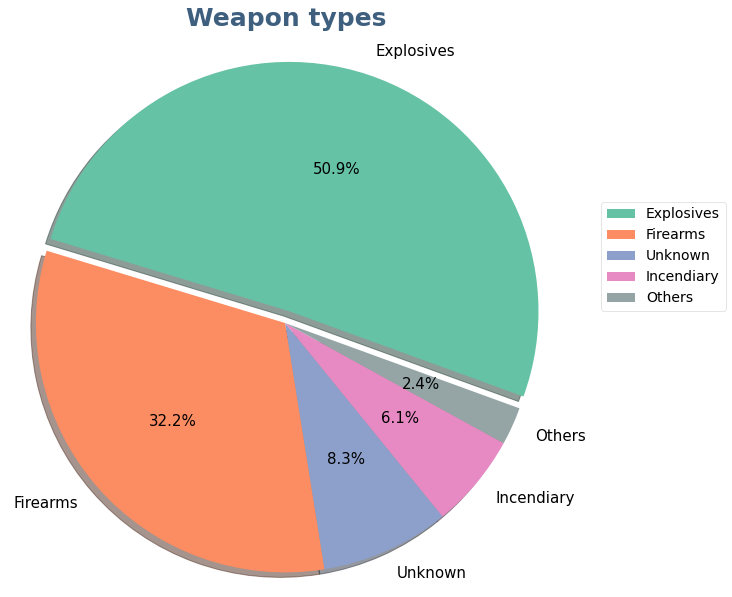

In [42]:
weaptype_filtered =data['Weaptype'].apply(lambda x: x if x in ['Explosives','Firearms','Unknown',
                                                               'Incendiary'] else 'Others')
weaptype = weaptype_filtered.value_counts().tolist()

# Pie chart of weapons types
weap_labels = ['Explosives','Firearms','Unknown','Incendiary','Others']

weap_sizes = []

for j in weaptype:
    percent = j*100/len(data['Weaptype'])
    weap_sizes.append(percent)

fig, ax = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax.pie(weap_sizes, labels=weap_labels, autopct='%1.1f%%',
        startangle = -20, shadow = True,
        explode = (0.05, 0, 0, 0, 0),
        colors = sns.color_palette("Set2", 8)[:4:1]+
                                   [(0.5843137254901961, 0.6470588235294118, 0.6509803921568628)],
        textprops={'fontsize':15,'weight':'light','color':'k'})

ax.axis('equal')
plt.title('Weapon types', fontsize= 25, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) #pad change the distance from title to graph

ax.legend(loc='lower right',framealpha = 0.5,bbox_to_anchor=(1.2,0.5,0.1,1), prop={'size': 14})
fig.show()

In [43]:

# Create table_2 about Weapon types and number of Dead/Injured People
table_2 = data[['Weaptype','Damage']].groupby('Weaptype',as_index = False).sum().sort_values(by='Damage', 
                                                                                             ascending=False)
df_count = data['Weaptype'].value_counts()
df_count = df_count.reindex(table_2['Weaptype'].values)
table_2['WeapCount'] = df_count.values
table_2["Weap_damage_rate"] = table_2["Damage"]/table_2["WeapCount"]
table_2

,Weaptype,Damage,WeapCount,Weap_damage_rate
2,Explosives,537788.0,92426,5.818579
4,Firearms,225473.0,58524,3.852659
10,Unknown,50167.0,15157,3.309824
11,Vehicle,20297.0,136,149.242647
6,Melee,14489.0,3655,3.964159
1,Chemical,14377.0,321,44.788162
5,Incendiary,8898.0,11135,0.799102
0,Biological,814.0,35,23.257143
9,Sabotage Equipment,357.0,141,2.531915
7,Other,225.0,114,1.973684


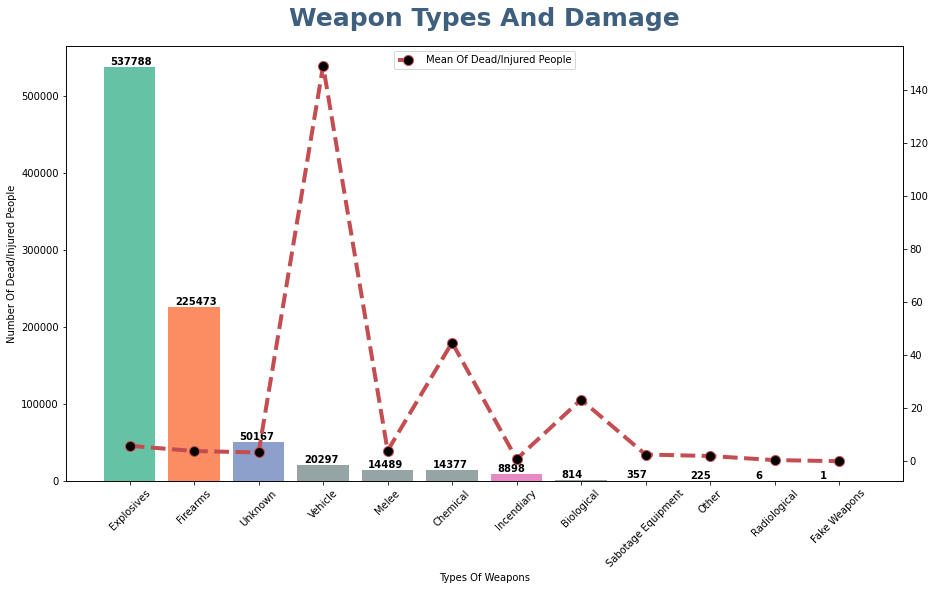

In [44]:
# Set same color with previous pie chart
weap_labels = table_2['Weaptype'].tolist()
y = np.arange(len(weap_labels)) 
weap_dmg = table_2['Damage'].tolist()

w_cat = ['Explosives','Firearms','Unknown','Incendiary']
w_color_cat = sns.color_palette("Set2", 8)[:4:1]
w_color_cat_dict = dict(zip(w_cat, w_color_cat))

w_gray = (0.5843137254901961, 0.6470588235294118, 0.6509803921568628)
w_color_list = [w_color_cat_dict[ter_type] if ter_type in w_color_cat_dict.keys() 
                else w_gray for ter_type in weap_labels]

w_rate = table_2["Weap_damage_rate"].tolist()
fig, ax1 = plt.subplots(figsize=(15,8))

# Bar chart
ax1.bar(weap_labels, weap_dmg,
       color = w_color_list,
       align='center')

# Number in bar chart
for i,v in enumerate(weap_dmg):
    ax1.text(i-0.3, v-13000 if v==37209 else v+3000, str(round(v)), 
             color='w' if v==37209 else 'k',
             fontweight='bold')


# Insert a second plot -line plot
ax2 = ax1.twinx()
ax2.plot(weap_labels, w_rate, linestyle='--', linewidth =4, marker ='o', 
         markerfacecolor='black', markersize =10,
         label='Mean Of Dead/Injured People',
        color = '#C44D51')

plt.title('Weapon Types And Damage', fontsize= 25, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) 

ax1.set(xlabel='Types Of Weapons', ylabel='Number Of Dead/Injured People')

ax1.set_xticklabels(weap_labels, rotation=45)

plt.yticks(fontsize=10)

ax2.legend(loc='upper center') 
fig.show()


# **Data analysis of Global Terrorism from 2000 to 2017¶**
<br>
Top 10 countries with the highest Number of Dead/Injured people in the world from 2000 to 2017

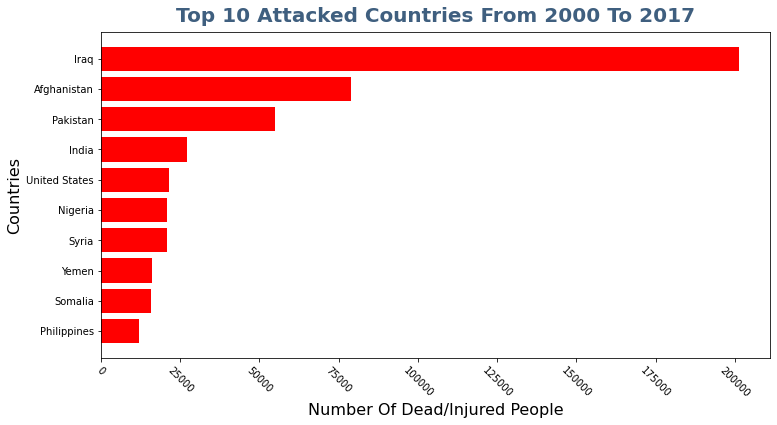

In [45]:
#Choose comlumn Country and Damage from data
country_damage = data[data['Year'] > 1999][["Country", "Damage"]].groupby('Country',as_index=False).sum()
data_paint = country_damage.sort_values(by='Damage', ascending = False).head(10)

#Paint the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(data_paint["Country"][::-1], data_paint["Damage"][::-1], color = 'red')
plt.xticks(rotation=-45)
ax.set_ylabel('Countries', size=16)
ax.set_xlabel('Number Of Dead/Injured People', size=16)
plt.title("Top 10 Attacked Countries From 2000 To 2017", fontsize= 20, pad= 10, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.show()


Top 10 targeted nationalities with the highest number of Dead/Injured People from 2000 to 2017 **bold text**

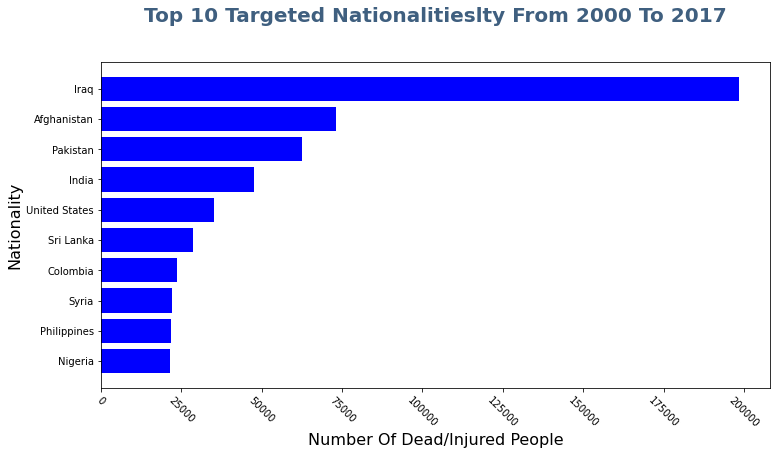

In [47]:
#Choose comlumn Country and Damage from data
nalty_damage = data[["Natlty1", "Damage"]].groupby('Natlty1', as_index=False).sum()
data_paint_natlty = nalty_damage.sort_values(by='Damage', ascending = False).head(10)
fig, ax = plt.subplots(figsize=(12, 6))

#Paint bar chart
ax.barh(data_paint_natlty["Natlty1"][::-1], data_paint_natlty["Damage"][::-1], color = 'blue')
plt.xticks(rotation=-45)
ax.set_ylabel('Nationality', size=16)
ax.set_xlabel('Number Of Dead/Injured People', size=16)
plt.title("Top 10 Targeted Nationalitieslty From 2000 To 2017", fontsize= 20, pad= 40, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])

plt.show()


**Identify the safest countries from 2000 to 2017 which has 0 dead/injured people caused by Terrorist Attack**

In [48]:
#Filter from dataframe country_damage
country_damage[country_damage["Damage"]==0]


,Country,Damage
9,Bahamas,0.0
14,Belize,0.0
34,Cyprus,0.0
64,Iceland,0.0
105,New Zealand,0.0
117,Portugal,0.0
129,Slovenia,0.0
139,Swaziland,0.0
147,Togo,0.0
160,Vietnam,0.0


**Function show both Top 10 Attacked Countries and Top 10 Targeted Nationalities charts **

In [50]:
def country_nationality(n):
  
    """
    Function to draw the bar charts 
    of Top 10 Attacked Countries and Top 10 Targeted Nationalities 
    """

    #Filter data and choose Top 10 Attacked Countries
    top10_bad = data[data['Year'] == n][["Country", "Damage"]].groupby('Country',as_index=False).sum()
    data_paint = top10_bad.sort_values(by='Damage', ascending = False).head(10)

    #Paint bar chart
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    ax[0].barh(data_paint["Country"][::-1], data_paint["Damage"][::-1], color = ['red', 'blue', 'green', '#34465D', '#df2029', '#FFFC00', '#E4405F', '#3B5999', '#00c300', '#ff0084'])
    ax[0].set_ylabel('Countries', size=16)
    ax[0].set_xlabel('Number Of Dead/Injured People', size=16)
    ax[0].set_title("Top 10 Attacked Countries %d" % n, fontsize= 15, pad= 10, weight ='bold', 
                  color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
    plt.subplots_adjust(wspace=0.3)
    #Filter data and choose Top 10 Targeted Nationalities    
    nalty_damage = data[["Natlty1", "Damage"]].groupby('Natlty1', as_index=False).sum()
    data_paint_natlty = nalty_damage.sort_values(by='Damage', ascending = False).head(10)

    #Paint bar chart
    ax[1].barh(data_paint_natlty["Natlty1"][::-1], data_paint["Damage"][::-1], color = ['red', 'blue', 'green', '#34465D', '#df2029', '#131418', '#AF0606', '#0084ff', '#ff6600', '#410093'])
    ax[1].set_xlabel('Number Of Dead/Injured People',size=16)
    ax[1].set_ylabel('Nationalities', size=16)
    ax[1].set_title("Top 10 Targeted Nationalities %d" % n, fontsize= 15, pad= 10, weight ='bold', 
                  color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
    for ax in fig.axes:
        plt.sca(ax)
    plt.show()

**Time-series Top 10 Attacked Countries and Top 10 Targeted Nationalities**

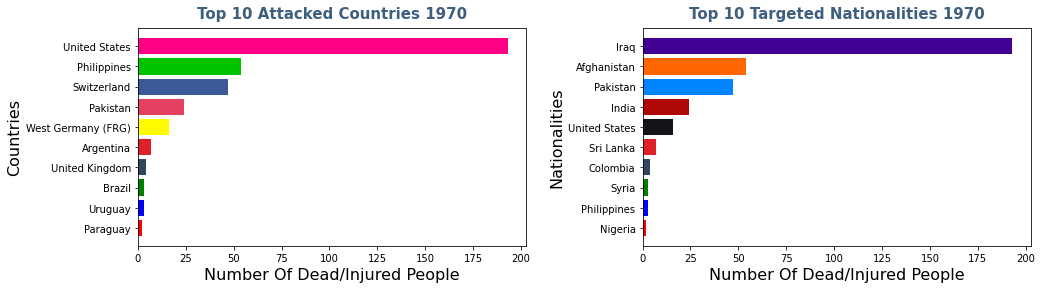

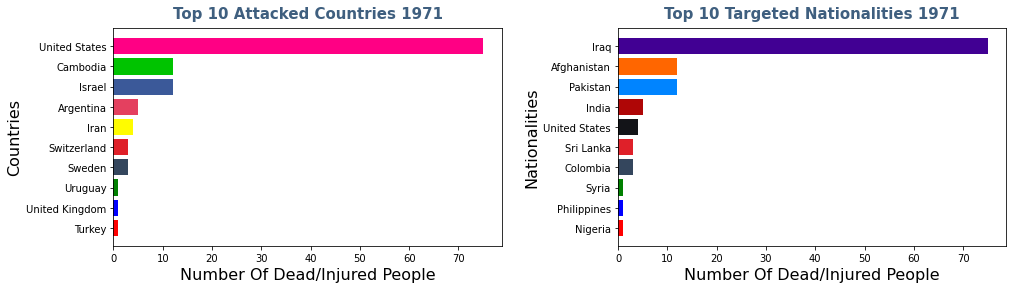

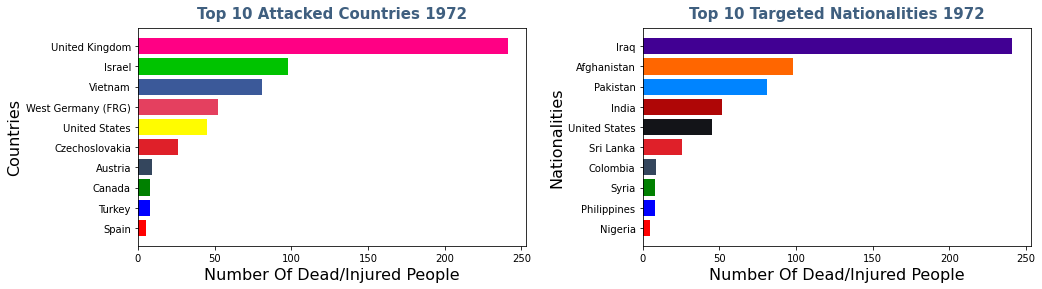

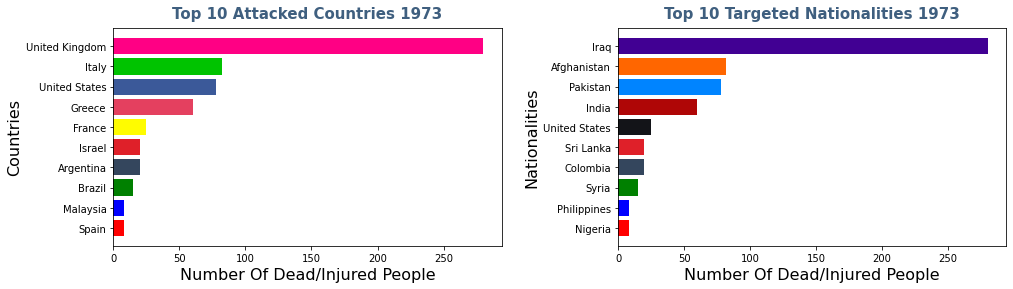

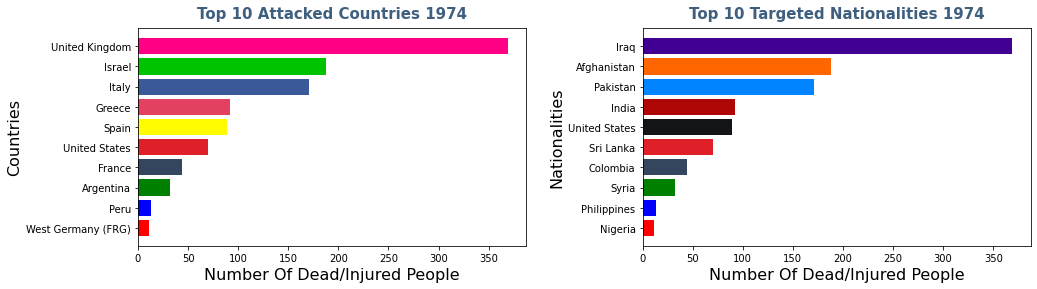

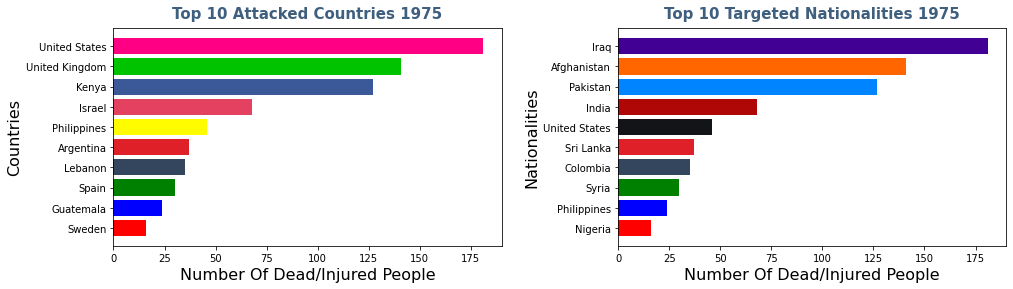

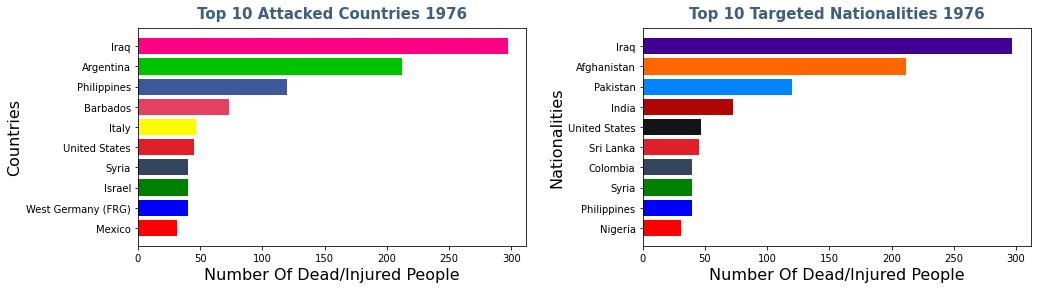

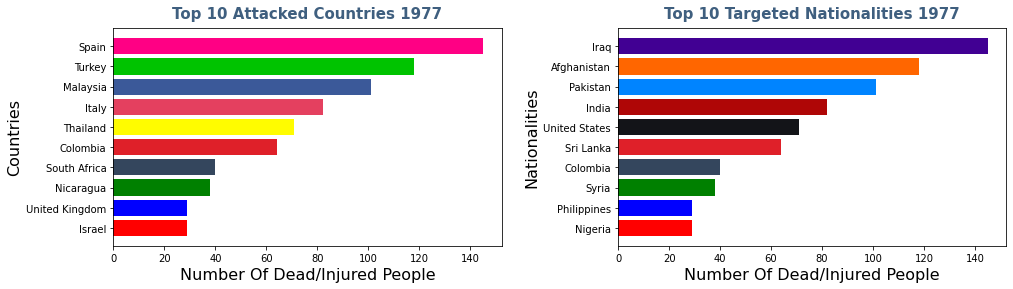

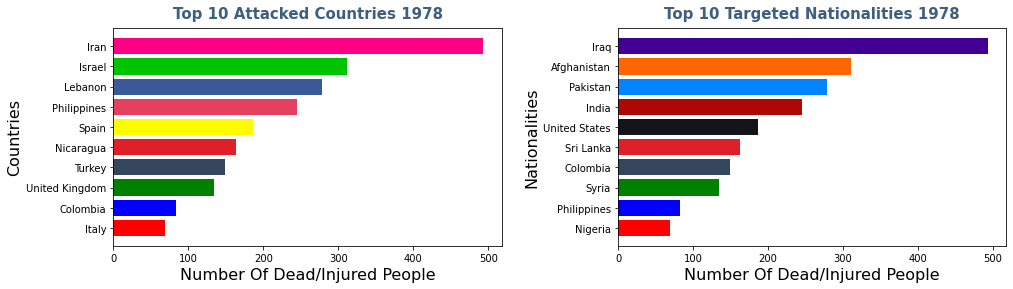

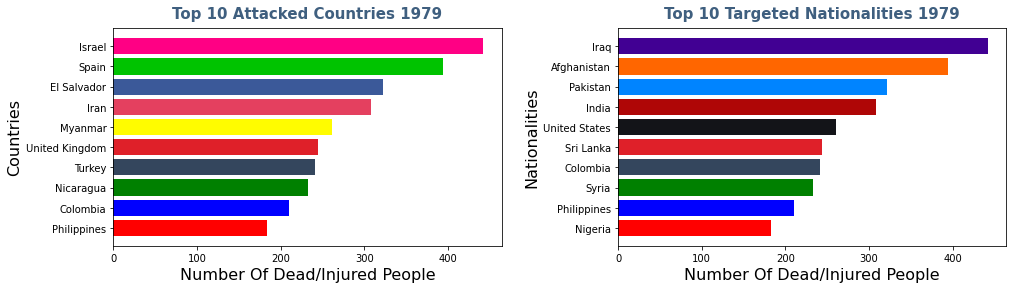

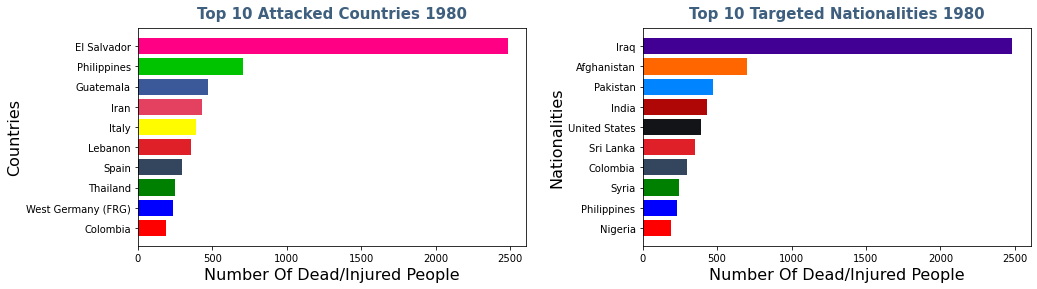

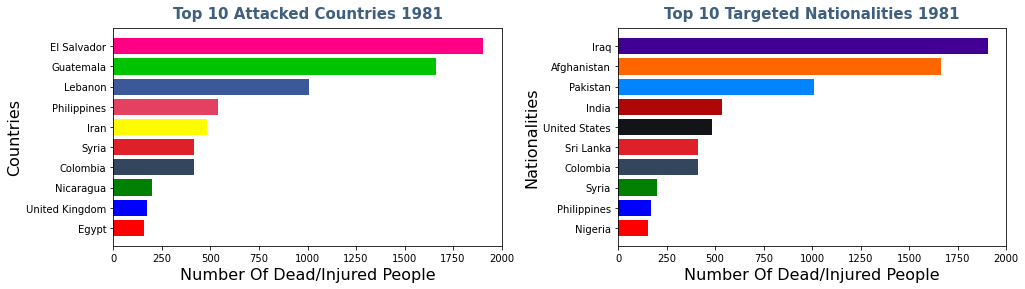

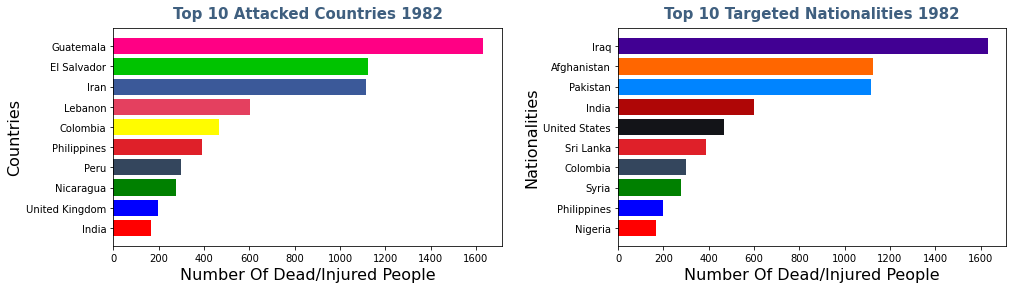

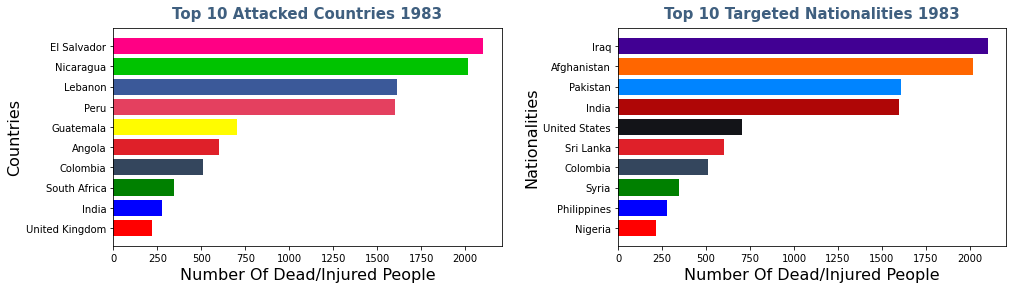

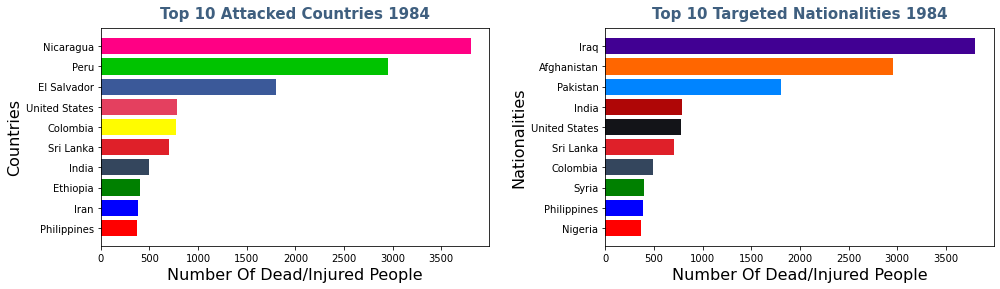

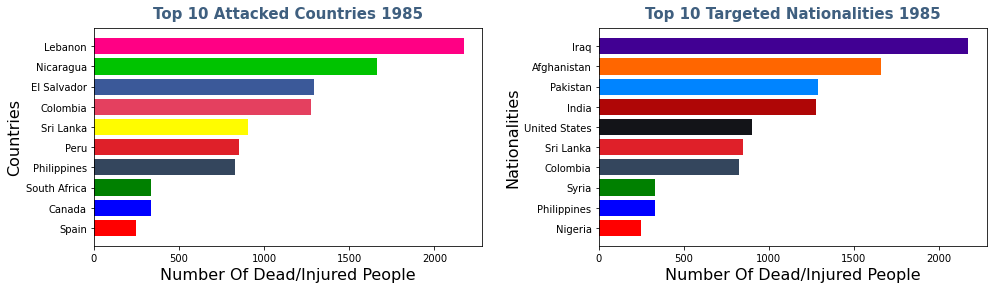

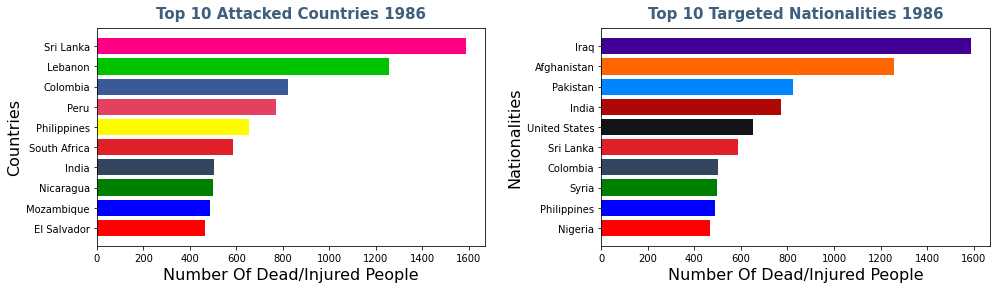

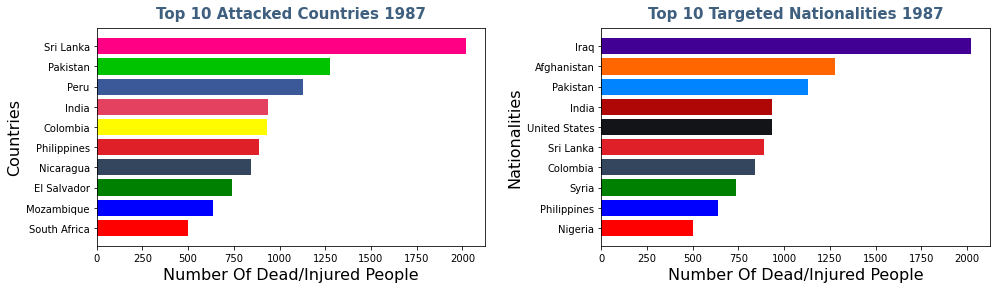

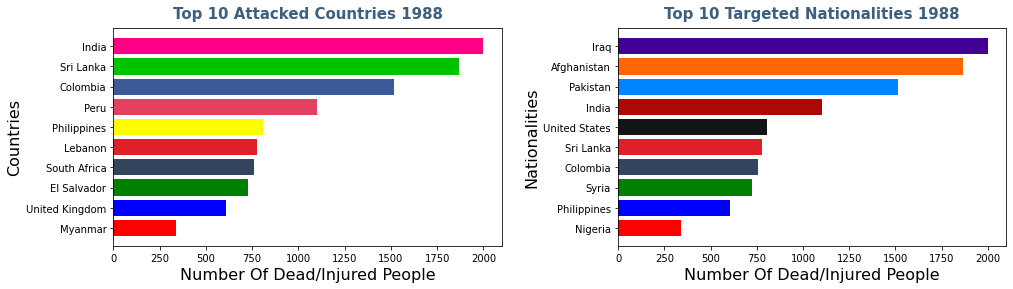

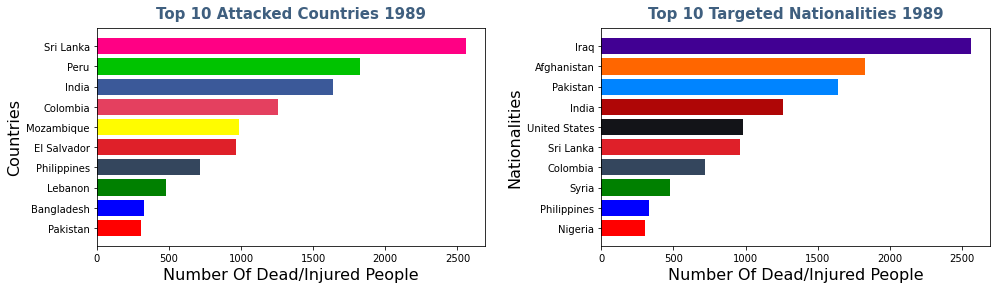

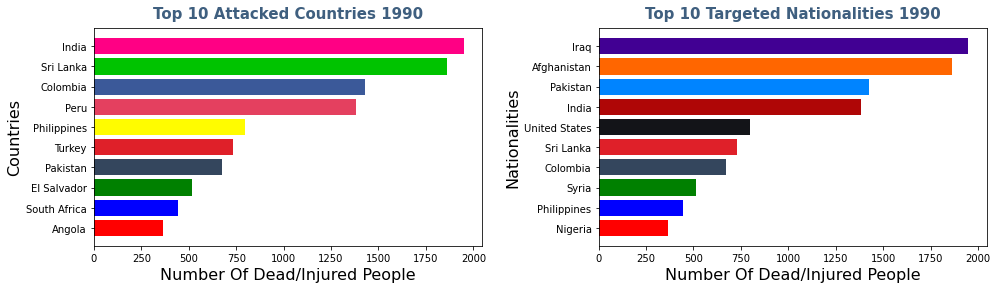

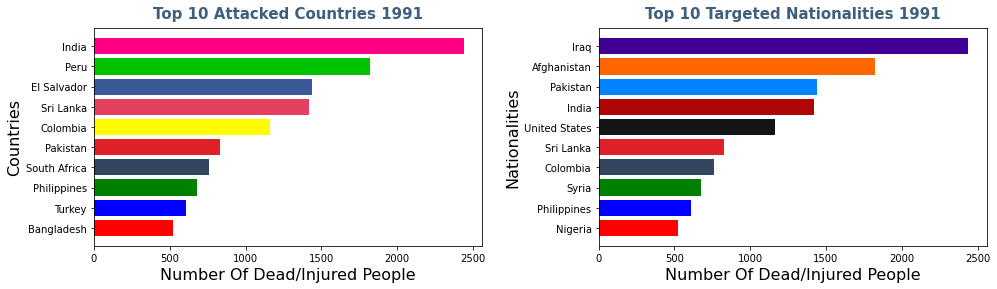

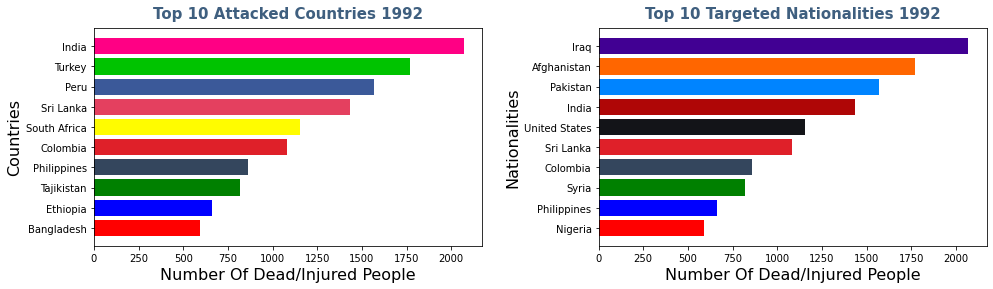

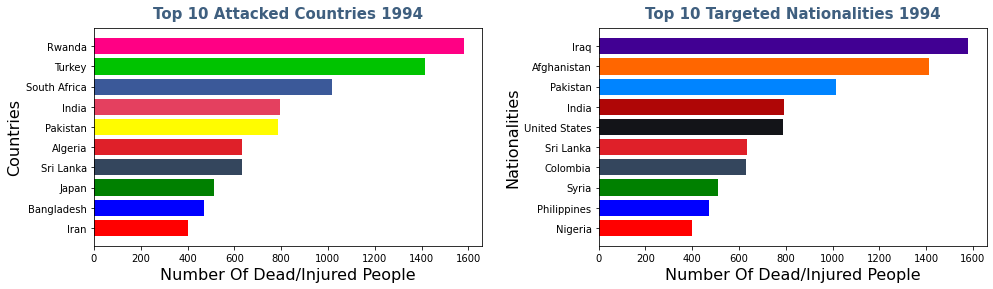

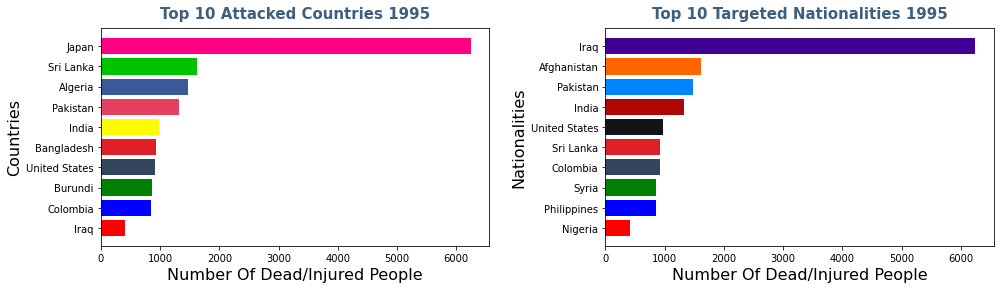

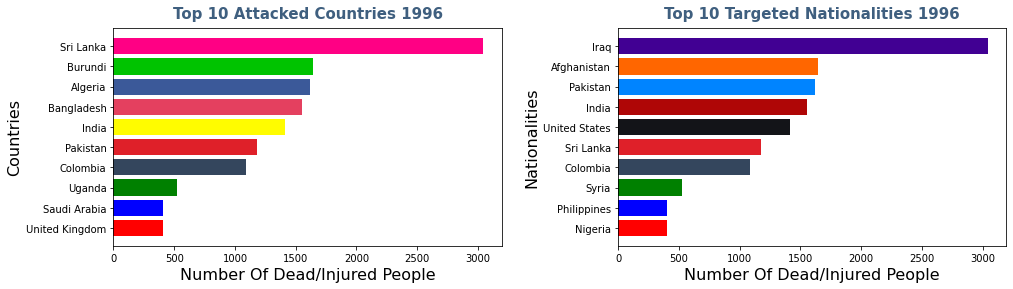

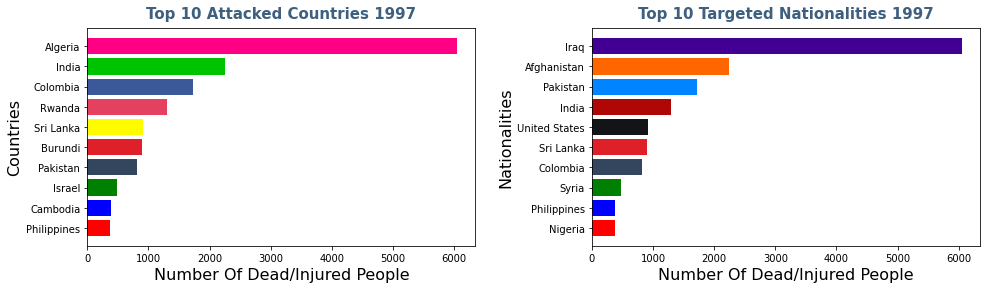

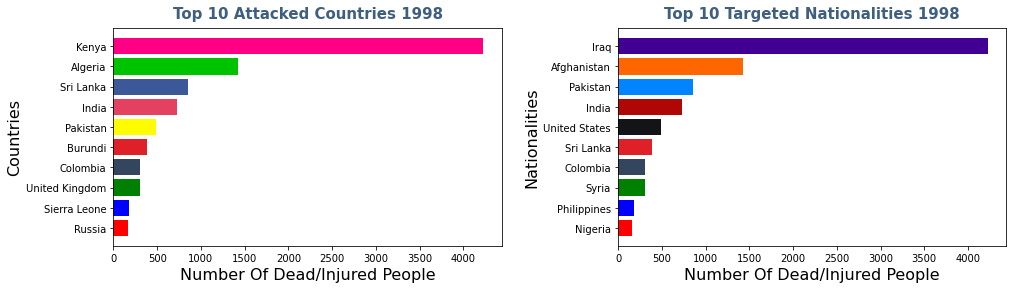

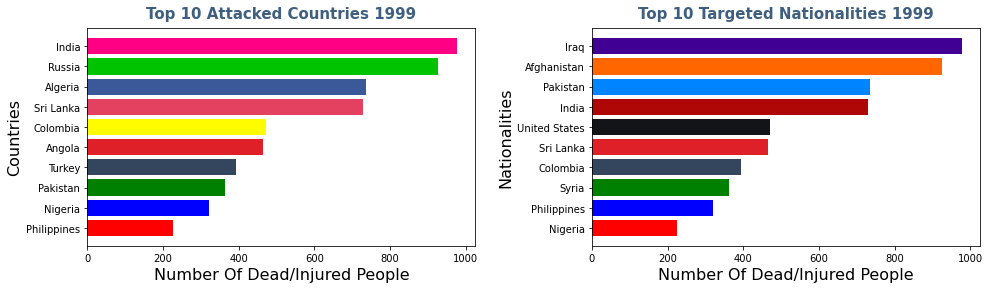

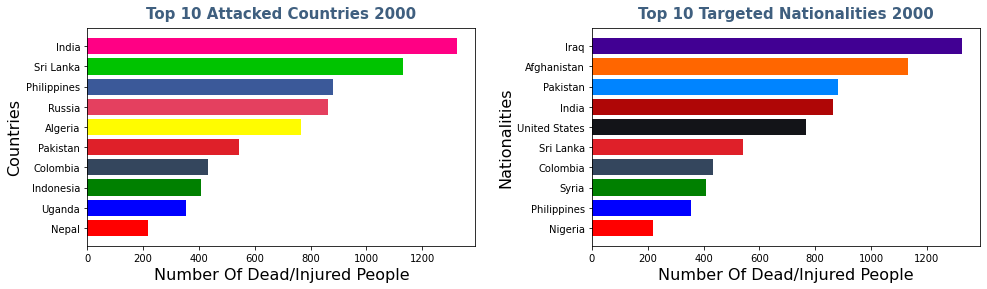

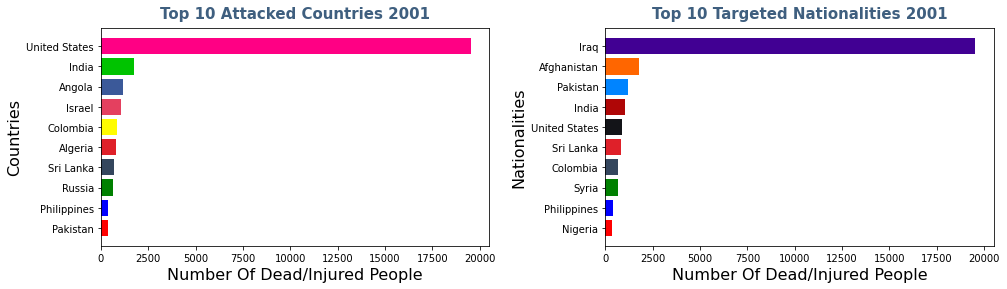

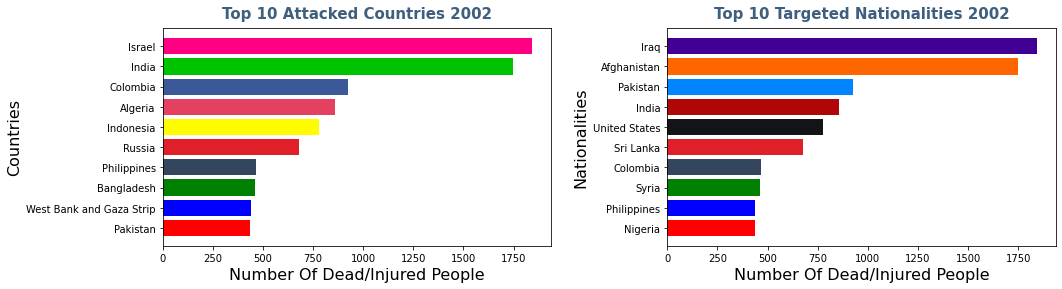

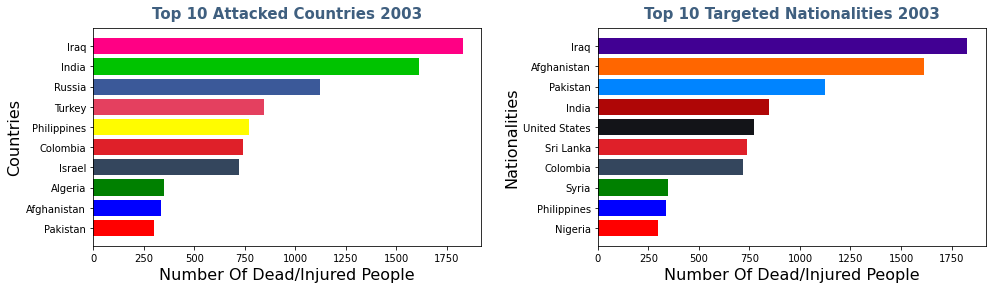

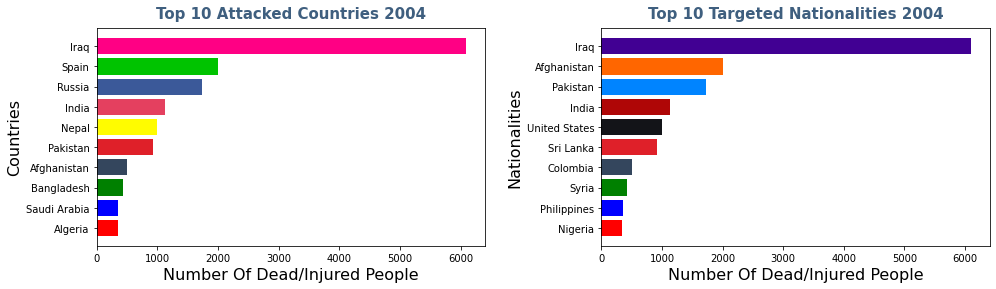

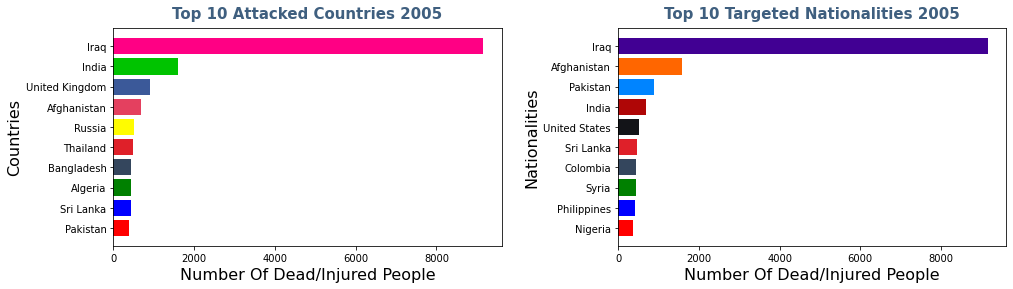

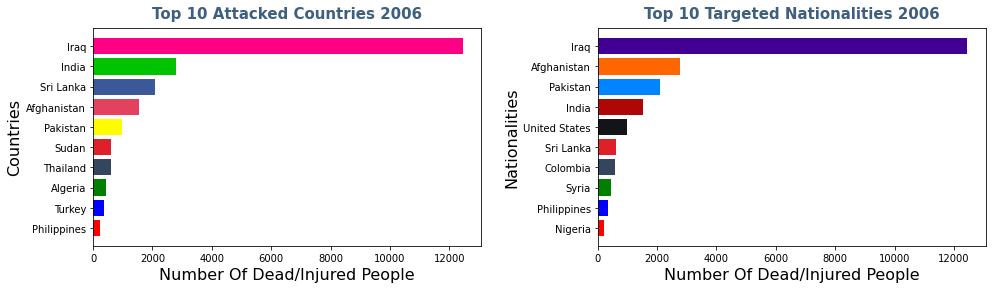

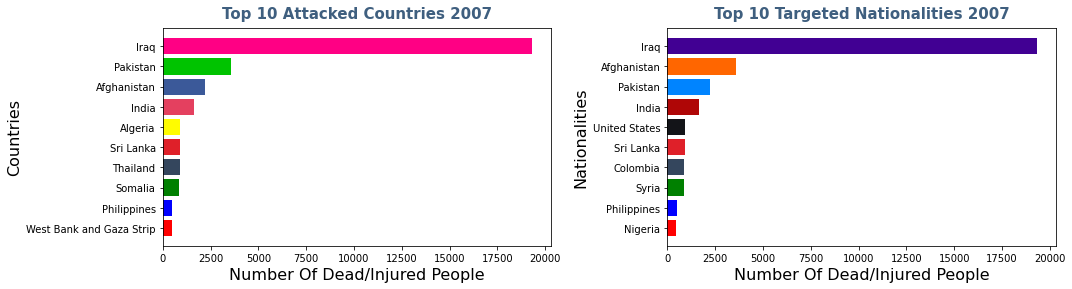

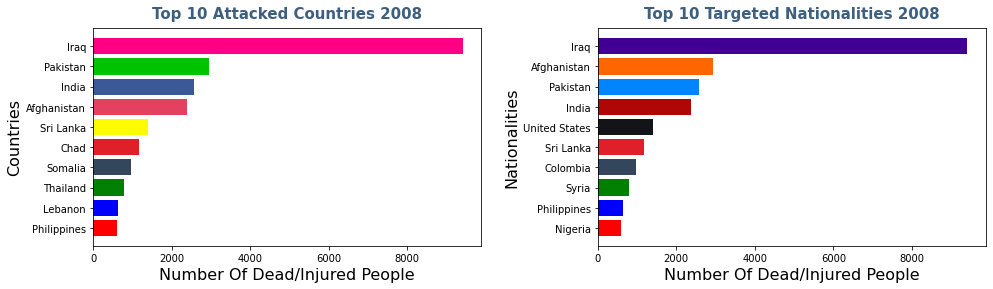

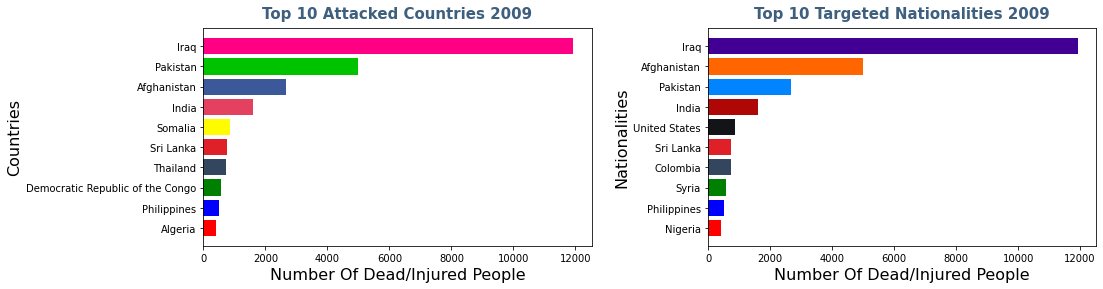

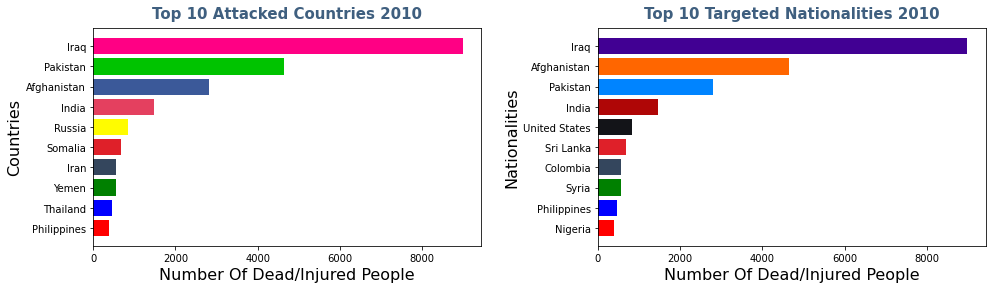

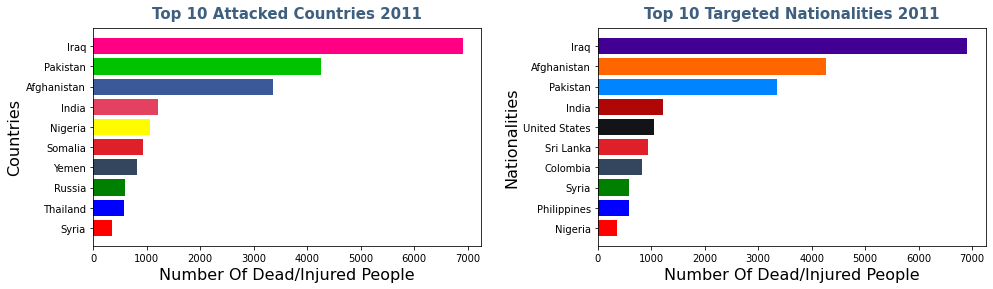

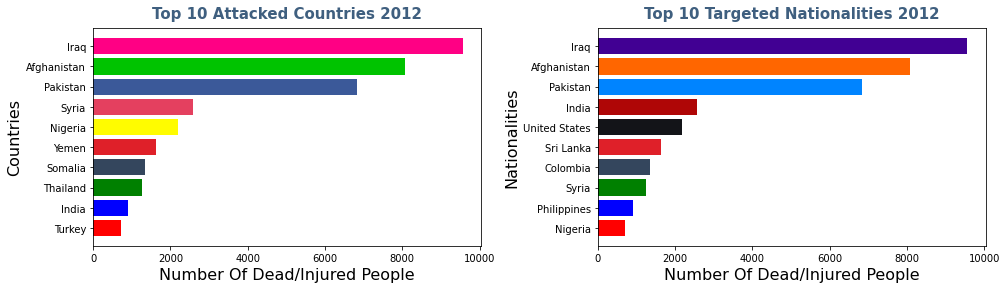

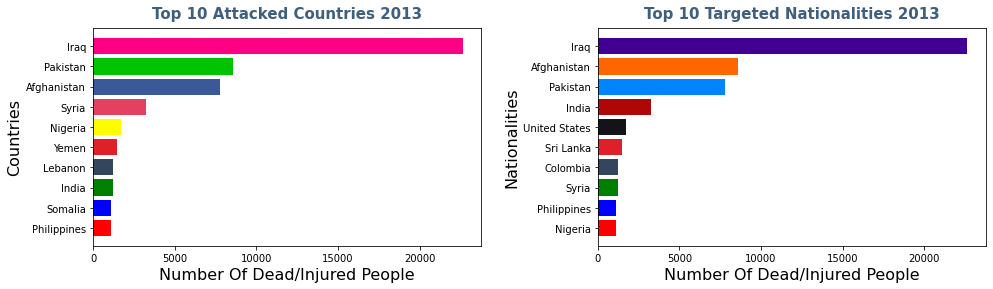

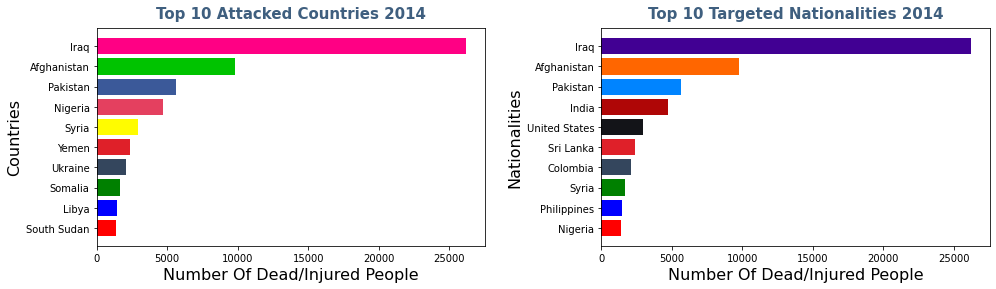

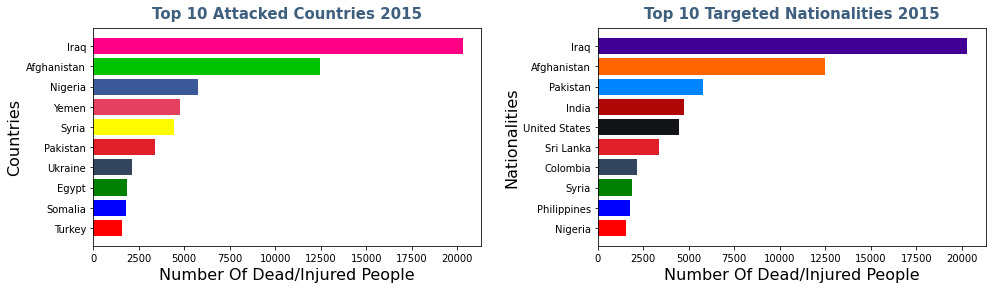

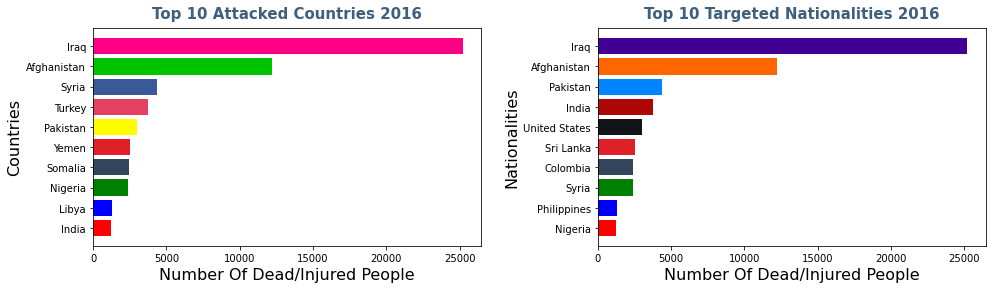

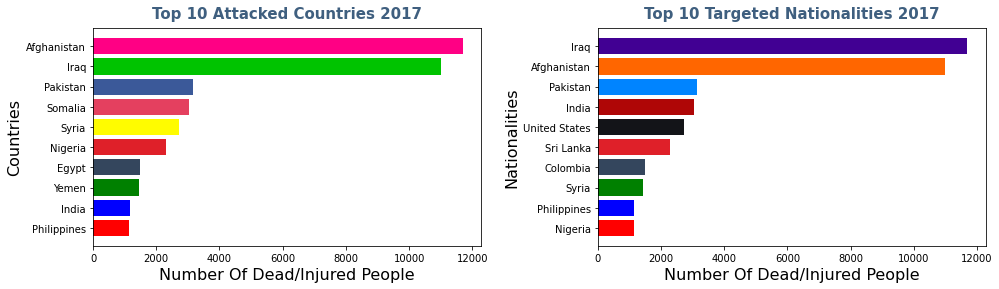

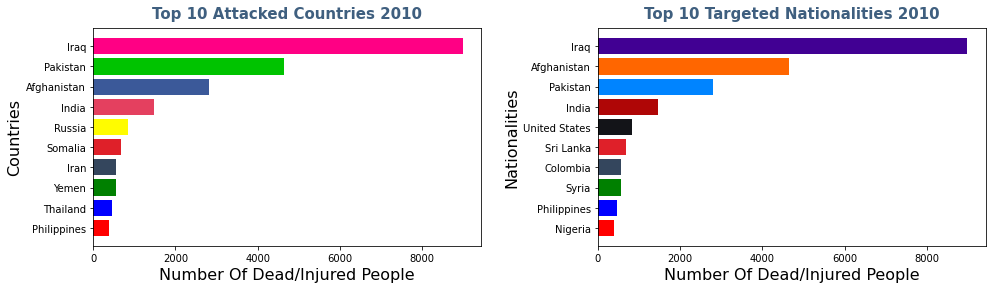

In [54]:
list_year = []
for year in range(1970,1993): list_year.append(year)
for year in range(1994,2018): list_year.append(year)

for year in list_year:
    country_nationality(year)

country_nationality(2010)

In [ ]:
country_nationality(2010)

**Draw chart of Top 10 Attacked Countries and Top 10 Targeted Nationalities with the specific year input**

Input the Year you want to see chart! (1970 -2017): 2010


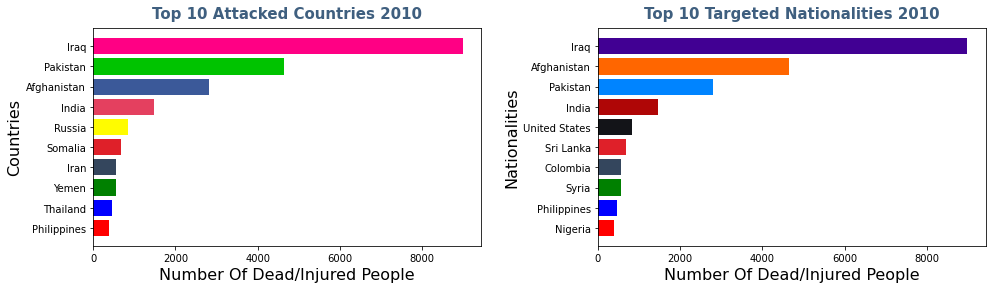

In [55]:
def country_nationality_year():
    """
    Function to paint chart with specific input year
    """

  # Input year. Try if it in list_year
    try:
        year = int(input ('Input the Year you want to see chart! (1970 -2017): '))
        if year == 1993:
            print('Sorry, No Terrorism Data in 1993')
            year = int(input ('Input the Year you want to see chart! (1970 -2017): '))
        while year not in list_year:
            print("Please Input the year from 1970 to 2017")
            year = int(input('Input the Year you want to see chart! (1970 -2017): '))

  #When have error, print error and call function timseri_year
    except (ValueError, ZeroDivisionError) as ex:  # Called when have error typing
        print("Wrong type, input again: ")
        country_nationality_year()

  #when don't have error: 
    else:
       #print chart with function timeseri(year)
        country_nationality(year)
country_nationality_year()

**The END** <br>
Github : https://github.com/ReiCHU31/Global-Terrorism-Report/blob/master/Global%20Terrorism%20Report.ipynb <br>

Github: https://github.com/Kushal997-das/THE-SPARKS-FOUNDATION/blob/master/Exploratory%20Data%20Analysis%20-%20Terrorism/Exploratory%20Data%20Analysis%20-%20Terrorism.ipynb
